### $\color{royalblue}{\text{Шеста вјежба из нумеричких метода у астрономији, датум: 22.01.2026.}} $

#### $\color{magenta}{\text{Нумеричка интеграција [наставак]}} $ - сплајн и трапезно правило.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import integrate
from Splajn_interpolacija import spline_interp, spline_integrate, inverse_interp, spline_der

**Густина чворова** - разматрање.

Потребно је одредити средње растојање Сатурна од Сунца трапезним методом, и помоћу сплајн интерполације, те анализирати 

релативну (апсолутну) грешку у зависности од густине чворова.

$$r_{sr}=\frac{1}{t_1-t_0} \int_{t_0}^{t_1}{rdt}$$

In [2]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

n = 50 # мијењати

t = t[0::n]
x = x[0::n]
y = y[0::n]
z = z[0::n]

r = np.sqrt(x**2+y**2+z**2)

In [3]:
r_trapez = 0
for i in range (len(r)-1):
    r_trapez+=(r[i+1]+r[i])*(t[i+1]-t[i])/2
r_trapez = r_trapez/(t[-1]-t[0])
    

r_splajn = spline_integrate(t, r, t[0], t[-1])
r_splajn = r_splajn/(t[-1]-t[0])

print('(Трапезна метода) r = ', r_trapez, 'АЈ')
print('(Сплајн) r =', r_splajn, 'АЈ')

print('Релативна грешка трапезне методе у односу на сплајн је: {} %'.format(np.round((r_trapez-r_splajn)/r_splajn*100, 5)))


(Трапезна метода) r =  9.549719452837051 АЈ
(Сплајн) r = 9.550535387614248 АЈ
Релативна грешка трапезне методе у односу на сплајн је: -0.00854 %


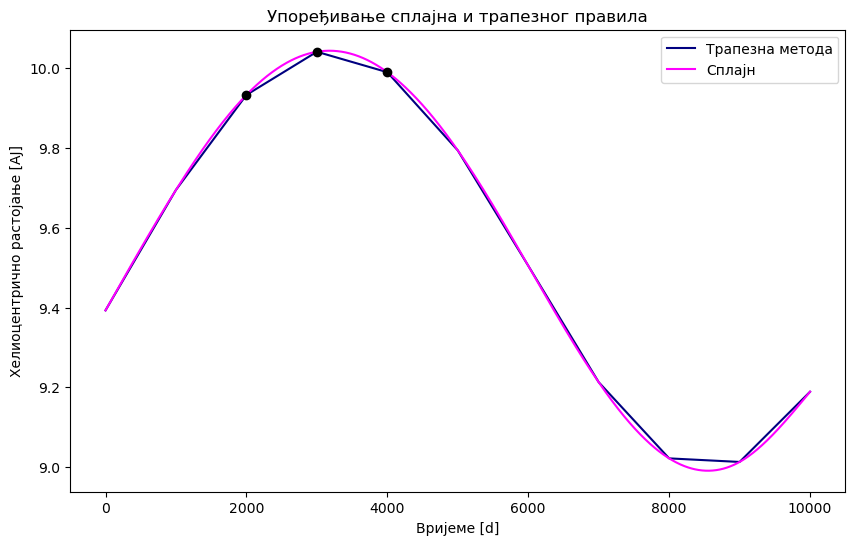

In [4]:
plt.figure(figsize=(10, 6))
xx = np.linspace(t[0], t[-1], 1000)
yy = spline_interp(t, r, xx)

plt.plot(t, r, color='navy', label='Трапезна метода')
plt.plot(xx, yy, color='magenta', label='Сплајн')

# узимамо дио интервала јер се на цијелом грешке компензују

r = r[t<=4000]
t = t[t<=4000]

r = r[t>=2000]
t = t[t>=2000]

plt.plot(t, r, 'o', color='black')
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]')
plt.title('Упоређивање сплајна и трапезног правила')
plt.legend()
plt.show()

In [5]:
r_trapez = 0
for i in range (len(r)-1):
    r_trapez+=(r[i+1]+r[i])*(t[i+1]-t[i])/2
r_trapez = r_trapez/(t[-1]-t[0])

r_splajn = spline_integrate(t, r, t[0], t[-1])
r_splajn = r_splajn/(t[-1]-t[0])

print('Релативна грешка трапезне методе у односу на сплајн (на специфичном интервалу) је {}  %'.format(np.round((r_trapez-r_splajn)/r_splajn*100, 5)))
print('Апсолутна грешка трапезне методе у односу на сплајн (на специфичном интервалу) је {} km'.format(np.round((r_trapez-r_splajn)*149600000))) 

Релативна грешка трапезне методе у односу на сплајн (на специфичном интервалу) је -0.09952  %
Апсолутна грешка трапезне методе у односу на сплајн (на специфичном интервалу) је -1490571.0 km


---

#### $\color{magenta}{\text{Монте Карло интеграција.}} $


In [6]:
# генерисање слуајних бројева

x_01 = random.random() # случајни број на интервалу [0,1)

b = 7.56
x_0b = random.random()*b # случајни број на интервалу [0,b)

a = 3.2
x_ab = random.random()*(b-a) + a # случајни број на интервалу [a,b)

print('Случајни број на интервалу [0, 1): {}'.format(x_01))
print('Случајни број на интервалу [0, {}): {}'.format(b, x_0b))
print('Случајни број на интервалу [{}, {}): {}'.format(a, b, x_ab))

Случајни број на интервалу [0, 1): 0.624787751826841
Случајни број на интервалу [0, 7.56): 2.2047575321894906
Случајни број на интервалу [3.2, 7.56): 6.887266006472053


**Примјер**: Планков закон

$$
B(\lambda, T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}
$$

Треба израчунати укупну количину зрачења на интервалу таласних дужина  $[\lambda_1, \lambda_2]$.

In [7]:
c = 299792458.
h = 6.62607004e-34
k = 1.38064852e-23
t = 5778
l = np.linspace(50e-9, 3000e-9, 1000) 

f = 2 * h * c**2/l**5/(np.exp(h * c/(l * k * t)) - 1)

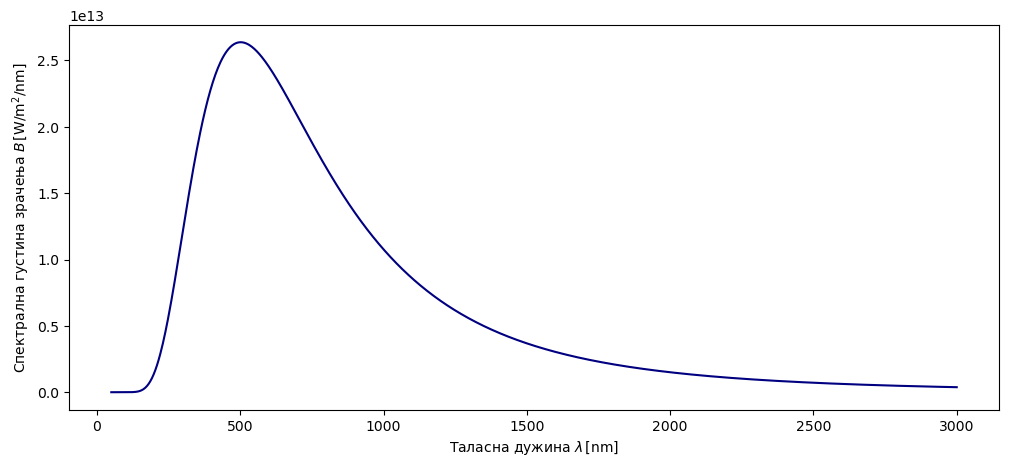

In [8]:
plt.figure(figsize=(12,5))
plt.plot(l*1e9, f, color='navy')
plt.xlabel(r'Таласна дужина $\lambda\,\rm[nm]$') 
plt.ylabel(r'Спектрална густина зрачења $B\,\rm [W/m^2/nm]$')  
plt.show()

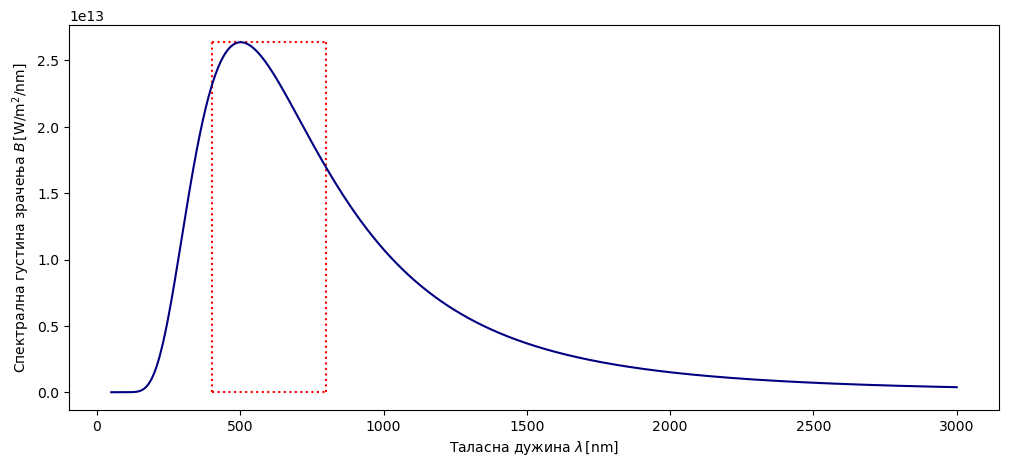

In [9]:
l1 = 400e-9
l2 = 800e-9

plt.figure(figsize=(12,5))
plt.plot([l1*1e9, l1*1e9], [0, np.max(f)], ':r')
plt.plot([l2*1e9, l2*1e9], [0, np.max(f)], ':r')
plt.plot([l1*1e9, l2*1e9], [np.max(f), np.max(f)], ':r')
plt.plot([l1*1e9, l2*1e9], [0, 0], ':r')
plt.plot(l*1e9, f, color='navy')
plt.xlabel(r'Таласна дужина $\lambda\,\rm[nm]$') 
plt.ylabel(r'Спектрална густина зрачења $B\,\rm [W/m^2/nm]$')  
plt.show()


$\color{magenta}{\text{(a) Погодак или промашај}} $ (*Hit or miss*)

Рјешавамо интеграл $I = \int_a^b f(x) \, dx$. Први корак је "уоквирити" функцију $f(x)$ у неки правоугаоник. То

је заправо услов $[a,b] \times [0, M]$ гдје је $M \geq \max f(x)$. Даље, генерише се $N$ случајних тачака $(x_i, y_i)$ 

гдје $x_i \sim U(a,b)$ и $y_i \sim U(0,M)$. Броје се погоци $N_h$, односно $y_i < f(x_i)\}$. Процјењује се интеграл:

$$
I \approx \frac{N_h}{N} \cdot M(b-a).
$$

In [10]:
N = np.arange(1000, 1000000, 10000) # број случајних тачака (гађања)
print(N)

hit_or_miss = np.zeros(len(N)) # иницијализација резултата (погодака)
s = (l2-l1)*max(f) # површина правоугаоника

[  1000  11000  21000  31000  41000  51000  61000  71000  81000  91000
 101000 111000 121000 131000 141000 151000 161000 171000 181000 191000
 201000 211000 221000 231000 241000 251000 261000 271000 281000 291000
 301000 311000 321000 331000 341000 351000 361000 371000 381000 391000
 401000 411000 421000 431000 441000 451000 461000 471000 481000 491000
 501000 511000 521000 531000 541000 551000 561000 571000 581000 591000
 601000 611000 621000 631000 641000 651000 661000 671000 681000 691000
 701000 711000 721000 731000 741000 751000 761000 771000 781000 791000
 801000 811000 821000 831000 841000 851000 861000 871000 881000 891000
 901000 911000 921000 931000 941000 951000 961000 971000 981000 991000]


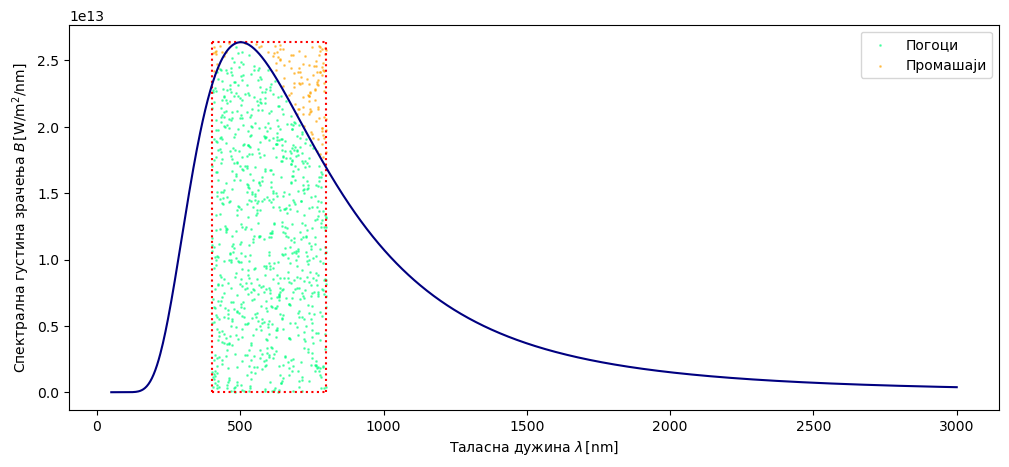

In [11]:
for i in range(len(N)):
  
    x = np.random.random(N[i])*(l2-l1)+l1 # насумичне таласне дужине
    y = np.random.random(N[i])*max(f) # вриједности функције 

    plank = 2 * h * c**2/x**5/(np.exp(h * c/(x * k * t)) - 1) # израчун за свако x
    
    # print(y<plank)

    hit = len(y[y<plank]) # број тачака испод криве (погоци)
    hit_or_miss[i] = hit/N[i] * s # површина испод криве


    if i == 0:  
        x_0 = x.copy()
        y_0 = y.copy()
        plank_0 = plank.copy()

hits_mask = y_0 < plank_0


plt.figure(figsize=(12, 5))
plt.plot([l1*1e9, l1*1e9], [0, np.max(f)], ':r')
plt.plot([l2*1e9, l2*1e9], [0, np.max(f)], ':r')
plt.plot([l1*1e9, l2*1e9], [np.max(f), np.max(f)], ':r')
plt.plot([l1*1e9, l2*1e9], [0, 0], ':r')
plt.plot(l*1e9, f, color='navy')

plt.scatter(x_0[hits_mask]*1e9, y_0[hits_mask], 
            c='springgreen', s=1, alpha=0.5, label='Погоци')
plt.scatter(x_0[~hits_mask]*1e9, y_0[~hits_mask], 
            c='orange', s=1, alpha=0.5, label='Промашаји')

plt.xlabel(r'Таласна дужина $\lambda\,\rm[nm]$') 
plt.ylabel(r'Спектрална густина зрачења $B\,\rm [W/m^2/nm]$')
plt.legend()
plt.show()


$\color{magenta}{\text{(б) Просјечна вриједност}} $ (*Sample mean*)

Опет рјешавамо интеграл $I = \int_a^b f(x) \, dx$. Генерише се $N$ случајних тачака $x_i \sim U(a,b)$.

Врши се израчун функције за сваку тачку: $f(x_i)$. На крају се процјењује интеграл:

$$
I \approx \frac{b-a}{N} \sum_{i=1}^N f(x_i) = (b-a) \cdot \langle f \rangle.
$$

In [12]:
sample_mean = np.zeros(len(N)) 

for i in range(len(N)):
    x = np.random.random(N[i])*(l2-l1)+l1  
    plank = 2 * h * c**2/x**5/(np.exp(h * c/(x * k * t)) - 1)
    sample_mean[i]=np.mean(plank)*(l2-l1) 

Упоређујемо *Hit or miss* и *Sample mean*, а вриједност добијемо сплајном користимо као референцу.

In [13]:
l = np.linspace(50e-9, 3000e-9, 10000) 
f = 2 * h * c**2/l**5/(np.exp(h * c/(l * k * t)) - 1) 
integral_splajn = spline_integrate(l, f, l1, l2)

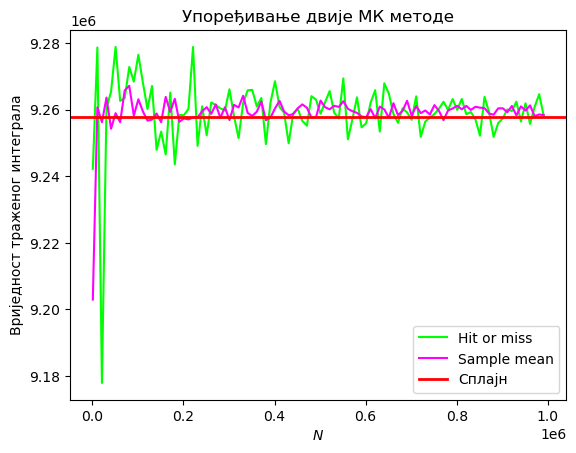

In [14]:
plt.plot(N, hit_or_miss, color='lime', label = 'Hit or miss')
plt.plot(N, sample_mean, color='magenta', label = 'Sample mean')
plt.axhline(integral_splajn, lw=2, color='red', label='Сплајн')
plt.xlabel(r'$N$')
plt.ylabel('Вриједност траженог интеграла')
plt.title('Упоређивање двије МК методе')
plt.legend()
plt.show()

In [15]:
integral_scipy, _ = integrate.quad(lambda x: 2*h*c**2/x**5/(np.exp(h*c/(x*k*t))-1),  l1, l2)
print('r_scipy = ', integral_scipy)
print('r_splajn = ', integral_splajn)
print('r_mcsm = ', np.mean(sample_mean[-10:]))

r_scipy =  9259864.11602517
r_splajn =  9257671.955827864
r_mcsm =  9259589.622644838


**Примјер**: рачунање запремине сфере путем Монте Карло интеграције.

Аналитичка формула је $V=\frac{4}{3}\pi R^3$.

Генеришемо $N$ случајних тачака унутар коцке $[-1, 1]^3$.  За случај *Hit or miss*, имаћемо:

$$
V=\frac{N_{\text{ins}}}{N}V_k.
$$

Што се тиче методе *Sample mean*, слиједи (преко теореме о средњој вриједности):

$$
V = \int_0^R 4\pi r^2 \, dr= 4\pi R \int_0^R r^2 \, dr / R = 4\pi R \langle r^2 \rangle,
$$

гдје је $\langle r^2 \rangle = \frac{1}{N}\sum r_i^2$.

In [16]:
R = 1.0 # jединична сфера
N = 100000

V_a = 4/3 * np.pi * R**3

In [17]:
# hit or miss
# сфера се поставља у коцку [-R, R]³
x = np.random.uniform(-R, R, N)
y = np.random.uniform(-R, R, N)
z = np.random.uniform(-R, R, N)

ins = (x**2 + y**2 + z**2) <= R**2
V_hit = np.sum(ins) / N * (2*R)**3  # запремина коцке ~ 8R³

# sample mean
r = np.random.uniform(0, R, N)
V_mean = 4 * np.pi * np.mean(r**2) * R 

In [18]:
print('Аналитичко рјешење:', V_a)
print('Hit or miss:', V_hit)
print('Sample mean:', V_mean)

Аналитичко рјешење: 4.1887902047863905
Hit or miss: 4.20272
Sample mean: 4.205581952555631


**Примјер**: Користећи Монте Карло методу, процијенити број детектабилних ванземаљских цивилизација у Галаксији.

Дрејкова једначина је дата као:

$$
N = R_* \cdot f_p \cdot n_e \cdot f_l \cdot f_i \cdot f_c \cdot L
$$

гдје фигуришу параметри:

- $R_* = 7$ - стопа формирања звијезда [*/god]
- $f_p = 0.5$ - удио звијезда са планетама
- $n_e = 1$ - просјечан број насељених планета по систему
- $f_l = 0.1$ - удио на којима настане живот
- $f_i = 0.01$ - удио на којима настане интелигенција
- $f_c = 0.1$ - удио интелигентних цивилизација које развију комуникацију
- $L = 10000$ - животни вијек цивилизације [god]

Процјена $N$ се врши ако узевши у обзир непоузданост параметара од $25\%$.


In [19]:
R_star = 7
f_p = 0.5
n_e = 1
f_l = 0.1
f_i = 0.01
f_c = 0.1
L = 10000

N_nom = R_star * f_p * n_e * f_l * f_i * f_c * L

N_mc = 100000
unc = 0.25

R_star_mc = np.random.uniform(R_star*(1-unc), R_star*(1+unc), N_mc)
f_p_mc = np.random.uniform(f_p*(1-unc), f_p*(1+unc), N_mc)
n_e_mc = np.random.uniform(n_e*(1-unc), n_e*(1+unc), N_mc)
f_l_mc = np.random.uniform(f_l*(1-unc), f_l*(1+unc), N_mc)
f_i_mc = np.random.uniform(f_i*(1-unc), f_i*(1+unc), N_mc)
f_c_mc = np.random.uniform(f_c*(1-unc), f_c*(1+unc), N_mc)
L_mc = np.random.uniform(L*(1-unc), L*(1+unc), N_mc)

N_civ = R_star_mc * f_p_mc * n_e_mc * f_l_mc * f_i_mc * f_c_mc * L_mc

print(f"Номинална вриједност: N = {N_nom:.1f}")
print(f"МК процјена: N = {np.mean(N_civ):.1f} ± {np.std(N_civ):.1f}")

Номинална вриједност: N = 3.5
МК процјена: N = 3.5 ± 1.4


#### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Користећи *Hit or miss* Монте Карло методу, процијенити број звијезда које се налазе у насељивој зони

неке галаксије која има приближно $10^{11}$ звијезда. Оне су униформно распоређене унутар диска галаксије

чији је радијус $16$ kpc и дебљина $1.2$ kpc. Насељива зона је тороидалног облика са унутрашњим радијусом 

од $2.8$ kpc и спољашњим радијусом $8.8$ kpc. Насељиве звијезде су оне дуговјечне и стабилне, што чини $7\%$

укупног броја звијезда насељиве зоне.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />